In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('ecommerce_data.csv')

# Convert date and create new revenue column
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Revenue'] = df['Quantity'] * df['Price']


In [2]:
# KPI Calculations
total_revenue = df['Revenue'].sum()
average_order_value = df['Revenue'].mean()
total_orders = df['OrderID'].nunique()
top_product = df.groupby('Product')['Quantity'].sum().idxmax()

# Display KPIs
print("=== KEY METRICS ===")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${average_order_value:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Most Sold Product: {top_product}")


=== KEY METRICS ===
Total Revenue: $4,650.00
Average Order Value: $775.00
Total Orders: 6
Most Sold Product: Headphones


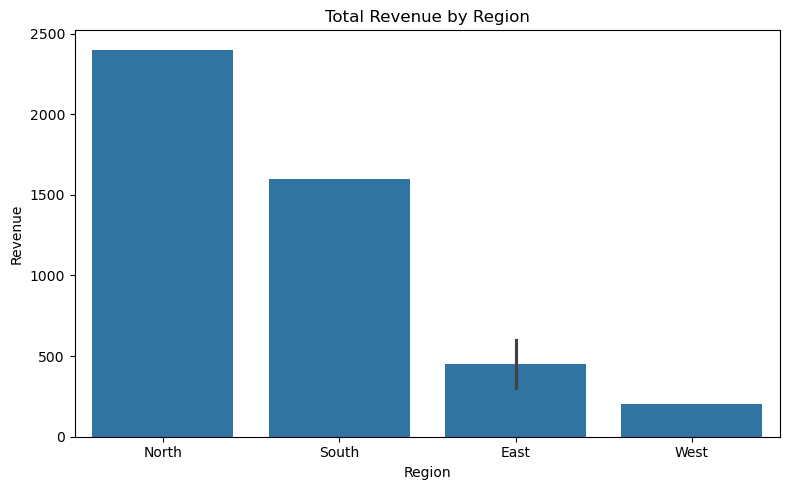

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Revenue', estimator=sum)
plt.title('Total Revenue by Region')
plt.tight_layout()
plt.show()


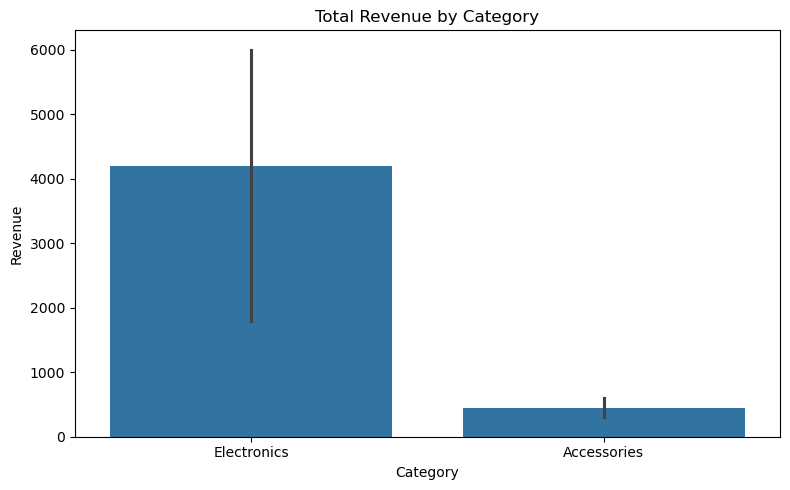

In [4]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Revenue', estimator=sum)
plt.title('Total Revenue by Category')
plt.tight_layout()
plt.show()


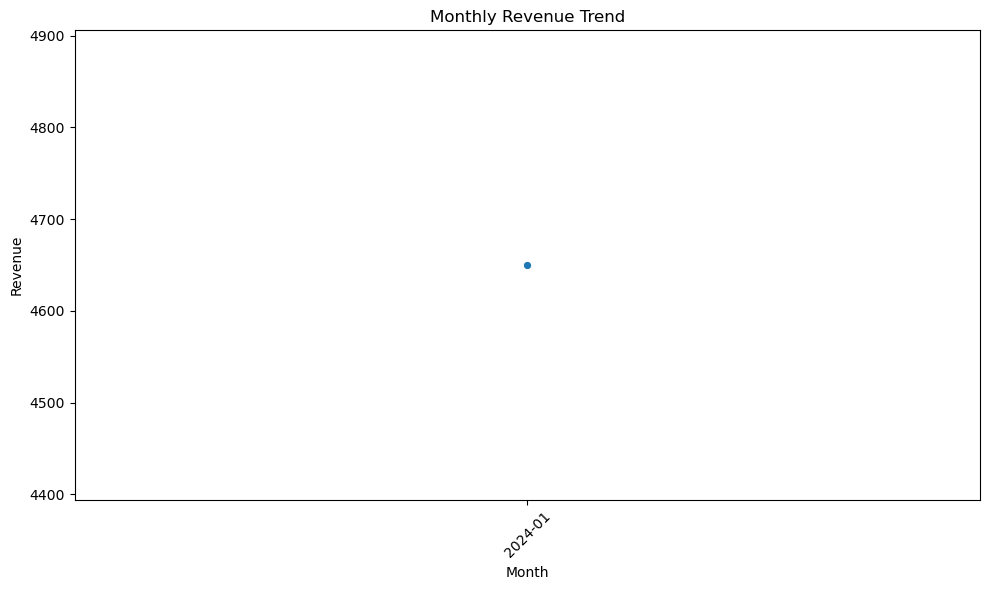

In [5]:
df['Month'] = df['OrderDate'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('Month')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_revenue, x='Month', y='Revenue', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


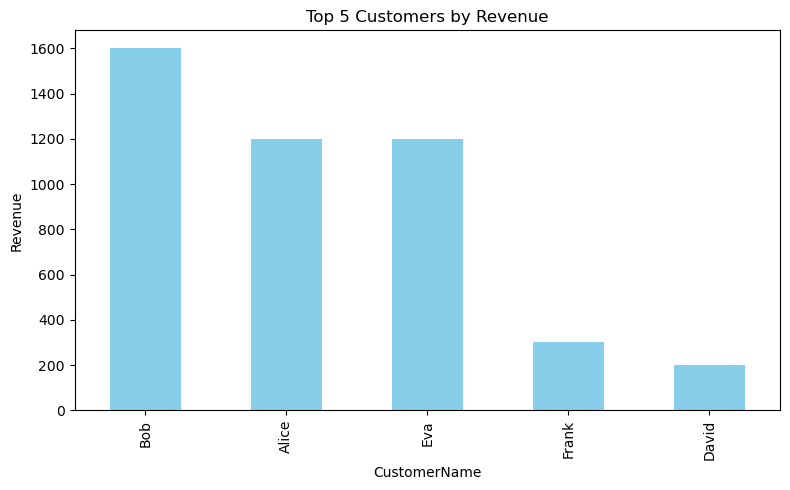

In [6]:
top_customers = df.groupby('CustomerName')['Revenue'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Customers by Revenue')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


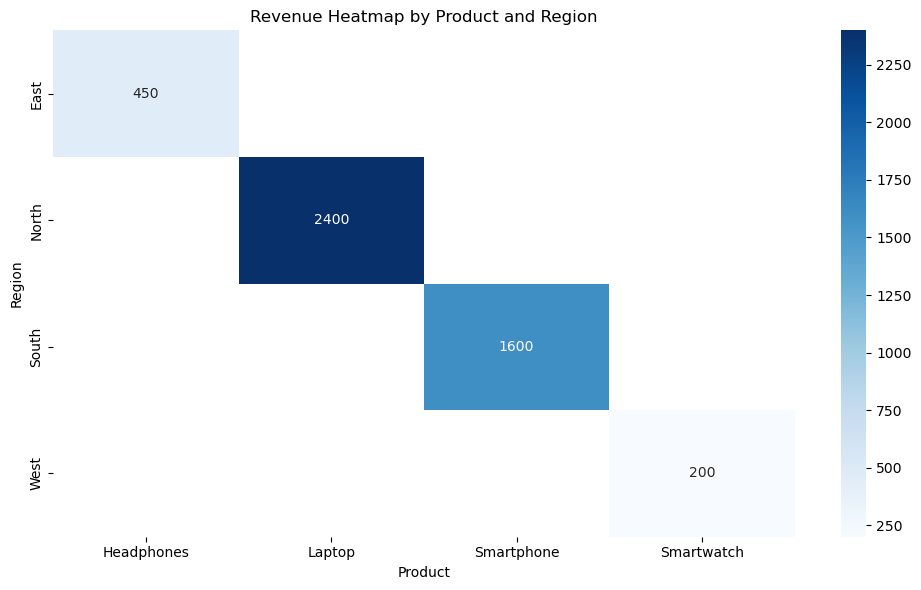

In [7]:
pivot = df.pivot_table(values='Revenue', index='Region', columns='Product', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='Blues')
plt.title('Revenue Heatmap by Product and Region')
plt.tight_layout()
plt.show()
